In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import json
import seaborn as sns

In [2]:
data = pd.read_csv(os.path.join('..','data','experiment_data.csv'))

In [3]:
best = 'Very intuitive, an explanation I could give or expect'
second_best = 'Intuitive'
middle = 'Neither intuitive or unintuitive'
second_worst = 'Unintuitive'
worst = 'Not intuitive at all, not an explanation I would give or expect'

data = data.replace(best,4).replace(second_best,3).replace(middle,2).replace(second_worst,1).replace(worst,0)

In [4]:
#filter_questions = data.iloc[:,1:4]
#filter_questions.columns = ['Native_Language', 'Nationality','Gender']
#filter_questions = filter_questions.iloc[4:]

In [5]:
#filter_questions['Native_Language'] = filter_questions['Native_Language'].apply(lambda x:x.title())
#filter_questions['Nationality'] = filter_questions['Nationality'].apply(lambda x:x.title())
#filter_questions.groupby(by=['Nationality','Native_Language']).agg(['count'])

In [6]:
cols = [col for col in data.columns if 
        (col != 'Timestamp') and ('Optional' not in col) 
                and (not col.startswith('Do') and (not col.startswith('What'))
                and (not col.startswith('Any')) and (not col.startswith('Unnamed')))]

#drop great grandparent
cols = cols[4:]

In [7]:
clean_data = data.loc[:,cols]

In [8]:
all_cols = [
    'aunt_aunt_brother',
    'aunt_child_grandparent',
    'aunt_parent_sister',
    'aunt_aunt_sister',
    'uncle_brother_uncle',
    'uncle_child_grandparent',
    'uncle_brother_parent',
    'uncle_sister_uncle',
    'spouse_spouse',
    'spouse_child_parent',
    'brother_child_uncle',
    'brother_child_parent',
    'brother_brother_sister',
    'brother_aunt_aunt',
    'brother_grandparent_grandparent',
    'brother_parent_parent',
    'brother_sister_sister',
    'brother_uncle_uncle',
    'sister_brother',
    'sister_brother_sister',
    'sister_aunt_child',
    'sister_child_parent',
    'sister_aunt_aunt',
    'sister_brother_brother',
    'sister_grandparent_grandparent',
    'sister_parent_parent',
    'sister_uncle_uncle',
    'grandparent_brother_grandparent',
    'grandparent_grandparent_spouse',
    'grandparent_parent_parent',
    'grandparent_grandparent_sister',
    'grandparent_aunt_child',
    'grandparent_child_parent',
    'grandparent_child_uncle',
    'grandparent_child_child',
    'child_child_sister',
    'child_brother_uncle',
    'child_brother_child',
    'child_grandparent_parent',
    'child_aunt_sister',
    'child_parent_spouse',
    'child_parent',
    'child_aunt_brother',
    'child_brother_parent',
    'child_child_grandparent',
    'child_parent_sister',
    'parent_brother_parent',
    'parent_child_grandparent',
    'parent_parent_spouse',
    'parent_parent_sister',
    'parent_aunt_sister',
    'parent_brother_child',
    'parent_grandparent_parent',
    'parent_child_sister',
    'parent_brother_uncle',
    'parent_child',
    'parent_child_spouse'
]

In [9]:
#dict((clean_data/5).mean(axis=0))

In [10]:
clean_data.columns = all_cols

In [11]:
#full = pd.concat([filter_questions,clean_data],axis=1)
#full.groupby(by=['Nationality','Native_Language']).agg(['mean'])

In [12]:
clean_data.insert(4,'aunt_grandparent_parent',clean_data['child_grandparent_parent'].values)
clean_data.insert(5,'aunt_brother_parent',clean_data['uncle_brother_parent'].values)
clean_data.insert(6,'aunt_sister_uncle',clean_data['uncle_sister_uncle'].values)
clean_data.insert(7,'aunt_brother_uncle',clean_data['uncle_brother_uncle'].values)

In [13]:
clean_data.insert(12,'uncle_aunt_brother',clean_data['aunt_aunt_brother'].values)
clean_data.insert(13,'uncle_aunt_sister',clean_data['aunt_aunt_sister'].values)
clean_data.insert(14,'uncle_grandparent_parent',clean_data['child_grandparent_parent'].values)
clean_data.insert(15,'uncle_parent_sister',clean_data['aunt_parent_sister'].values)

In [14]:
clean_data.insert(18,'spouse_child_child',clean_data['grandparent_child_child'].values)

In [15]:
clean_data.insert(27,'brother_sister',clean_data['sister_brother'].values)
clean_data.insert(28,'brother_aunt_child',clean_data['sister_aunt_child'].values)
clean_data.insert(28,'brother_brother_brother',clean_data['sister_brother_brother'].values)

In [16]:
clean_data.insert(30,'sister_sister_sister',clean_data['brother_sister_sister'].values)
clean_data.insert(40,'sister_child_uncle',clean_data['brother_child_uncle'].values)

In [17]:
clean_data.insert(39,'grandparent_parent_uncle',clean_data['grandparent_child_uncle'].values)
clean_data.insert(40,'grandparent_aunt_parent',clean_data['grandparent_aunt_child'].values)

In [18]:
clean_data.insert(62,'child_sister_uncle',clean_data['uncle_sister_uncle'].values)
clean_data.insert(63,'child_child_spouse',clean_data['parent_child_spouse'].values)

In [19]:
clean_data.insert(75,'parent_aunt_brother',clean_data['parent_aunt_sister'].values)
clean_data.insert(76,'parent_sister_uncle',clean_data['parent_brother_uncle'].values)

In [ ]:
#clean_data.iloc[:,:41].describe().T

In [ ]:
#clean_data.iloc[:,41:].describe().T

In [23]:
values = (clean_data).mean(axis=0)

In [24]:
#predicate_weights = dict((clean_data/4).mean(axis=0))
def round_quarter(x):
    return round(x*4)/4

predicate_weights = dict(round_quarter(values/4))

In [25]:
with open(os.path.join('..','data','predicate_weights.json'),'w') as f:
    json.dump(predicate_weights,f)    

In [26]:
#clean_data.describe()

In [27]:
predicate_weights

{'aunt_aunt_brother': 0.5,
 'aunt_child_grandparent': 0.5,
 'aunt_parent_sister': 1.0,
 'aunt_aunt_sister': 0.5,
 'aunt_grandparent_parent': 0.25,
 'aunt_brother_parent': 1.0,
 'aunt_sister_uncle': 0.5,
 'aunt_brother_uncle': 0.5,
 'uncle_brother_uncle': 0.5,
 'uncle_child_grandparent': 0.5,
 'uncle_brother_parent': 1.0,
 'uncle_sister_uncle': 0.5,
 'uncle_aunt_brother': 0.5,
 'uncle_aunt_sister': 0.5,
 'uncle_grandparent_parent': 0.25,
 'uncle_parent_sister': 1.0,
 'spouse_spouse': 0.75,
 'spouse_child_parent': 0.5,
 'spouse_child_child': 0.75,
 'brother_child_uncle': 0.25,
 'brother_child_parent': 0.75,
 'brother_brother_sister': 0.75,
 'brother_aunt_aunt': 0.25,
 'brother_grandparent_grandparent': 0.25,
 'brother_parent_parent': 0.75,
 'brother_sister_sister': 0.75,
 'brother_uncle_uncle': 0.25,
 'brother_sister': 0.75,
 'brother_brother_brother': 0.75,
 'brother_aunt_child': 0.25,
 'sister_sister_sister': 0.75,
 'sister_brother': 0.75,
 'sister_brother_sister': 0.75,
 'sister_aunt_

In [ ]:
# from scipy.stats import spearmanr

# rho, _ = spearmanr(clean_data[filter_questions['Native_Language']=='French'].mean(axis=0),
#                   clean_data[filter_questions['Native_Language']=='English'].mean(axis=0))

# print(rho)

In [ ]:
# from scipy.stats import mannwhitneyu

# stat, p = mannwhitneyu(clean_data[filter_questions['Native_Language']=='French'].mean(axis=0),
#                        clean_data[filter_questions['Native_Language']=='English'].mean(axis=0))

# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
#     print('Probably the same distribution')
# else:
#     print('Probably different distributions')

In [ ]:
# from scipy.stats import ttest_ind

# stat, p = ttest_ind(clean_data[filter_questions['Native_Language']=='French'].mean(axis=0),
#                        clean_data[filter_questions['Native_Language']=='English'].mean(axis=0))
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
#     print('Probably the same distribution')
# else:
#     print('Probably different distributions')

In [28]:
def bar_plot(values):
    
    std_error = np.std(values, ddof=1) / np.sqrt(len(values))
    
    ticks = np.arange(len(values))
    
    explanations = []

    for i in values.index:

        split_str = i.split('_')

        relation = split_str[0]
        
        explanations.append('_'.join(split_str[1:]))

    fig, ax = plt.subplots(figsize=(10,4))

    ax.bar(x=ticks, 
           height=values,
           yerr=std_error,
          capsize=4)
    
    ax.set_xticks(ticks=ticks)
    ax.set_xticklabels(labels=explanations,rotation = (45), fontsize = 10)
    
    ax.set_title(relation.title())
    plt.savefig(os.path.join('..','plots',f"{relation}.pdf"),bbox_inches='tight')

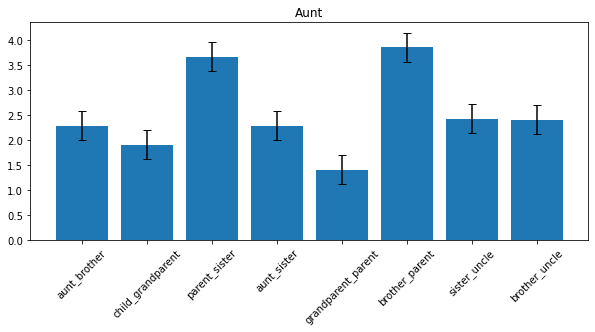

In [29]:
def get_idx(rule):
    return [idx for idx,i in enumerate(values.index) if i.startswith(rule)]

aunt_idx = get_idx('aunt')
bar_plot(values[aunt_idx])

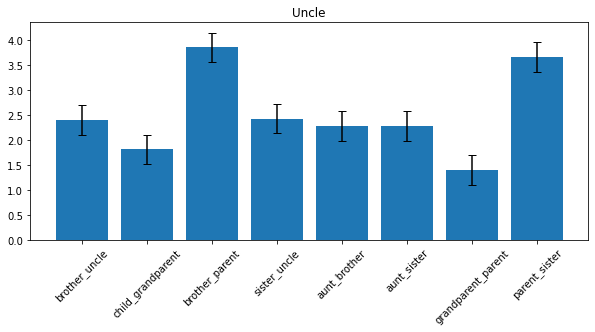

In [30]:
uncle_idx = get_idx('uncle')
bar_plot(values[uncle_idx])

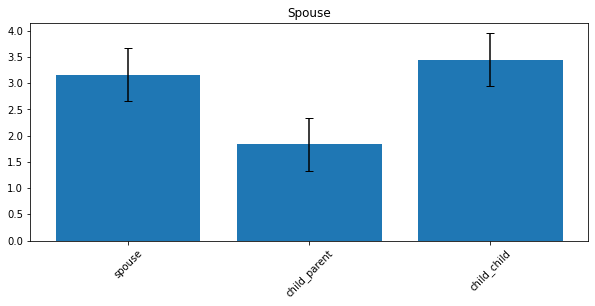

In [31]:
spouse_idx = get_idx('spouse')
bar_plot(values[spouse_idx])

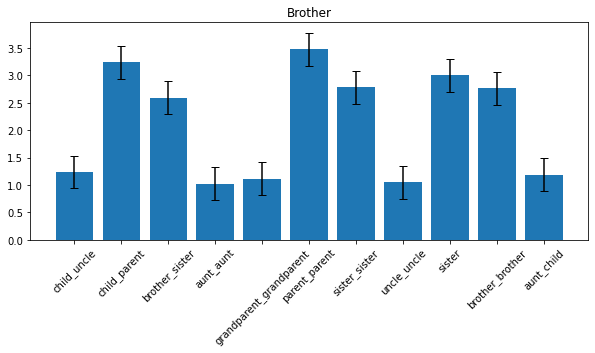

In [32]:
brother_idx = get_idx('brother')
bar_plot(values[brother_idx])

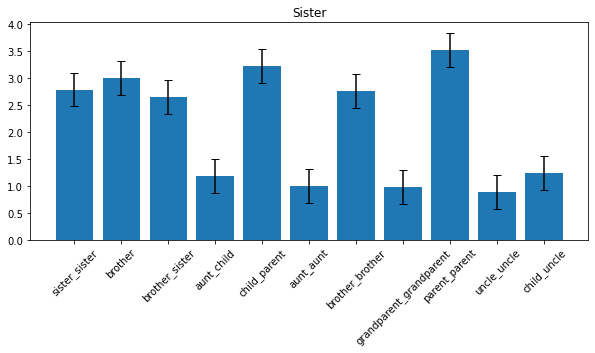

In [33]:
sister_idx = get_idx('sister')
bar_plot(values[sister_idx])

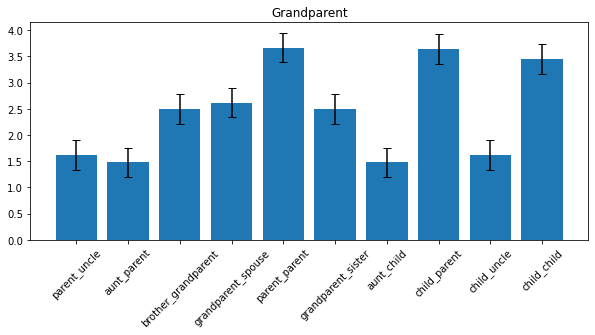

In [34]:
grandparent_idx = get_idx('grandparent')
bar_plot(values[grandparent_idx])

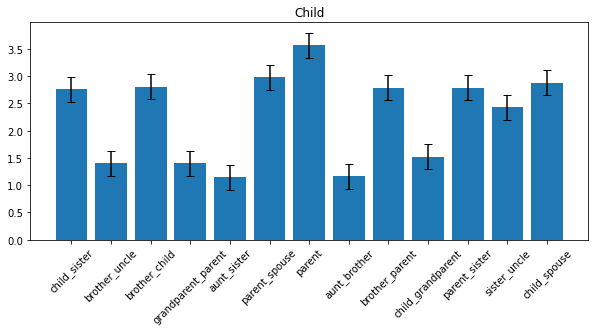

In [35]:
child_idx = get_idx('child')
bar_plot(values[child_idx])

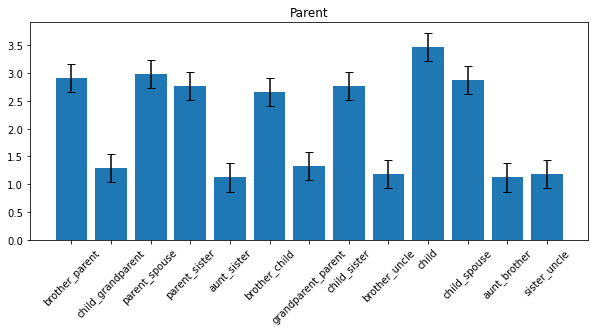

In [36]:
parent_idx = get_idx('parent')
bar_plot(values[parent_idx])

In [ ]:
# gnn_data = np.load(
#     os.path.join('..','data','preds',DATASET,
#         'gnn_explainer_'+DATASET+'_'+RULE+'_preds.npz'),allow_pickle=True)

In [ ]:
# for pred in gnn_data['preds']:
#     print(pred.shape)